In [7]:
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
import numpy as np
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
import skimage as skm
from skimage import exposure
from skimage.util import img_as_float

In [1]:
# Define the directories containing images and shapefiles
walrus_mres_dir = os.path.abspath("../../../")
# If this does not work replace the walrus_dir with your own path to get the data

# Create path to image 
image_path = os.path.join(walrus_mres_dir, "planet_skysat_pairs", "planet_skysat_pairs", "torellneset_skysatscene_pansharpened_udm2", "SkySatScene", "20230825_104320_ssc13d3_0006_pansharpened_clip.tif")

# Create path to shapefile 
shape_path = os.path.join(walrus_mres_dir, "GIS", "torellneset_clip_825.shp")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


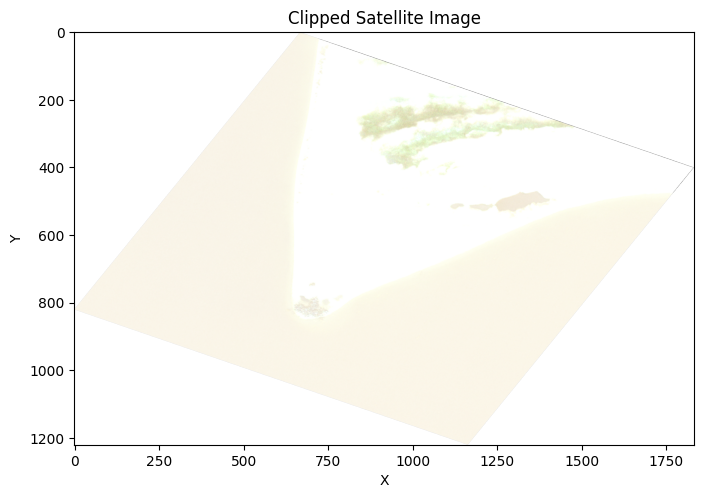

In [8]:
# Clip the image using shapefile 
def clip_image(image_path, shape_path):
    # Read the shapefile
    shapefile = gpd.read_file(shape_path)
    # Open the satellite image
    with rasterio.open(image_path) as src:
        # Clip the image
        clipped_image, clipped_transform = mask(src, shapefile.geometry, crop=True)
        # Get the metadata of the clipped image
        clipped_meta = src.meta.copy()
        clipped_meta.update({"driver": "GTiff",
                             "height": clipped_image.shape[1],
                             "width": clipped_image.shape[2],
                             "transform": clipped_transform})
    return clipped_image, clipped_meta

# File path to the satellite image (TIF file, not clip.tiff)
image_path = "C:\\Users\\Student\\Documents\\101_walrus_mres\\planet_skysat_pairs\\planet_skysat_pairs\\torellneset_skysatscene_pansharpened_udm2\\SkySatScene\\20230825_104320_ssc13d3_0006_pansharpened_clip.tif"

# Create path to the shapefile 
shape_path = "C:\\Users\\Student\\Documents\\101_walrus_mres\\GIS\\torellneset_clip_825.shp"

# Clip the image
clipped_image, clipped_meta = clip_image(image_path, shape_path)

# Plot the clipped image
plt.figure(figsize=(8, 6))
plt.imshow(clipped_image.transpose(1, 2, 0))  # Transpose to (height, width, bands) for visualization
plt.title('Clipped Satellite Image')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [9]:
ic = clipped_image
images = []
shape1 = ic[0].shape

In [10]:
shape1

(1221, 1834)

In [11]:
shape2 = ic[1].shape
shape3 = ic[2].shape
shape4 = ic[3].shape

In [12]:
for i in range(len(ic)):
    images.append(ic[i].flatten())

In [13]:
images

[array([0, 0, 0, ..., 0, 0, 0], dtype=uint16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)]

In [14]:
pca = PCA()
pca.fit(images)

PCA()

In [15]:
print(pca.components_.shape)

(4, 2239314)


In [16]:

pca.explained_variance_

array([6.34494287e+09, 6.84419666e+08, 1.53578625e+07, 1.12305276e-17])

In [17]:
pca.mean_

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
pc1 = pca.components_[0].reshape(shape1)
pc2 = pca.components_[1].reshape(shape1)
pc3 = pca.components_[2].reshape(shape1)
pc4 = pca.components_[3].reshape(shape1)

NameError: name 'pc5' is not defined

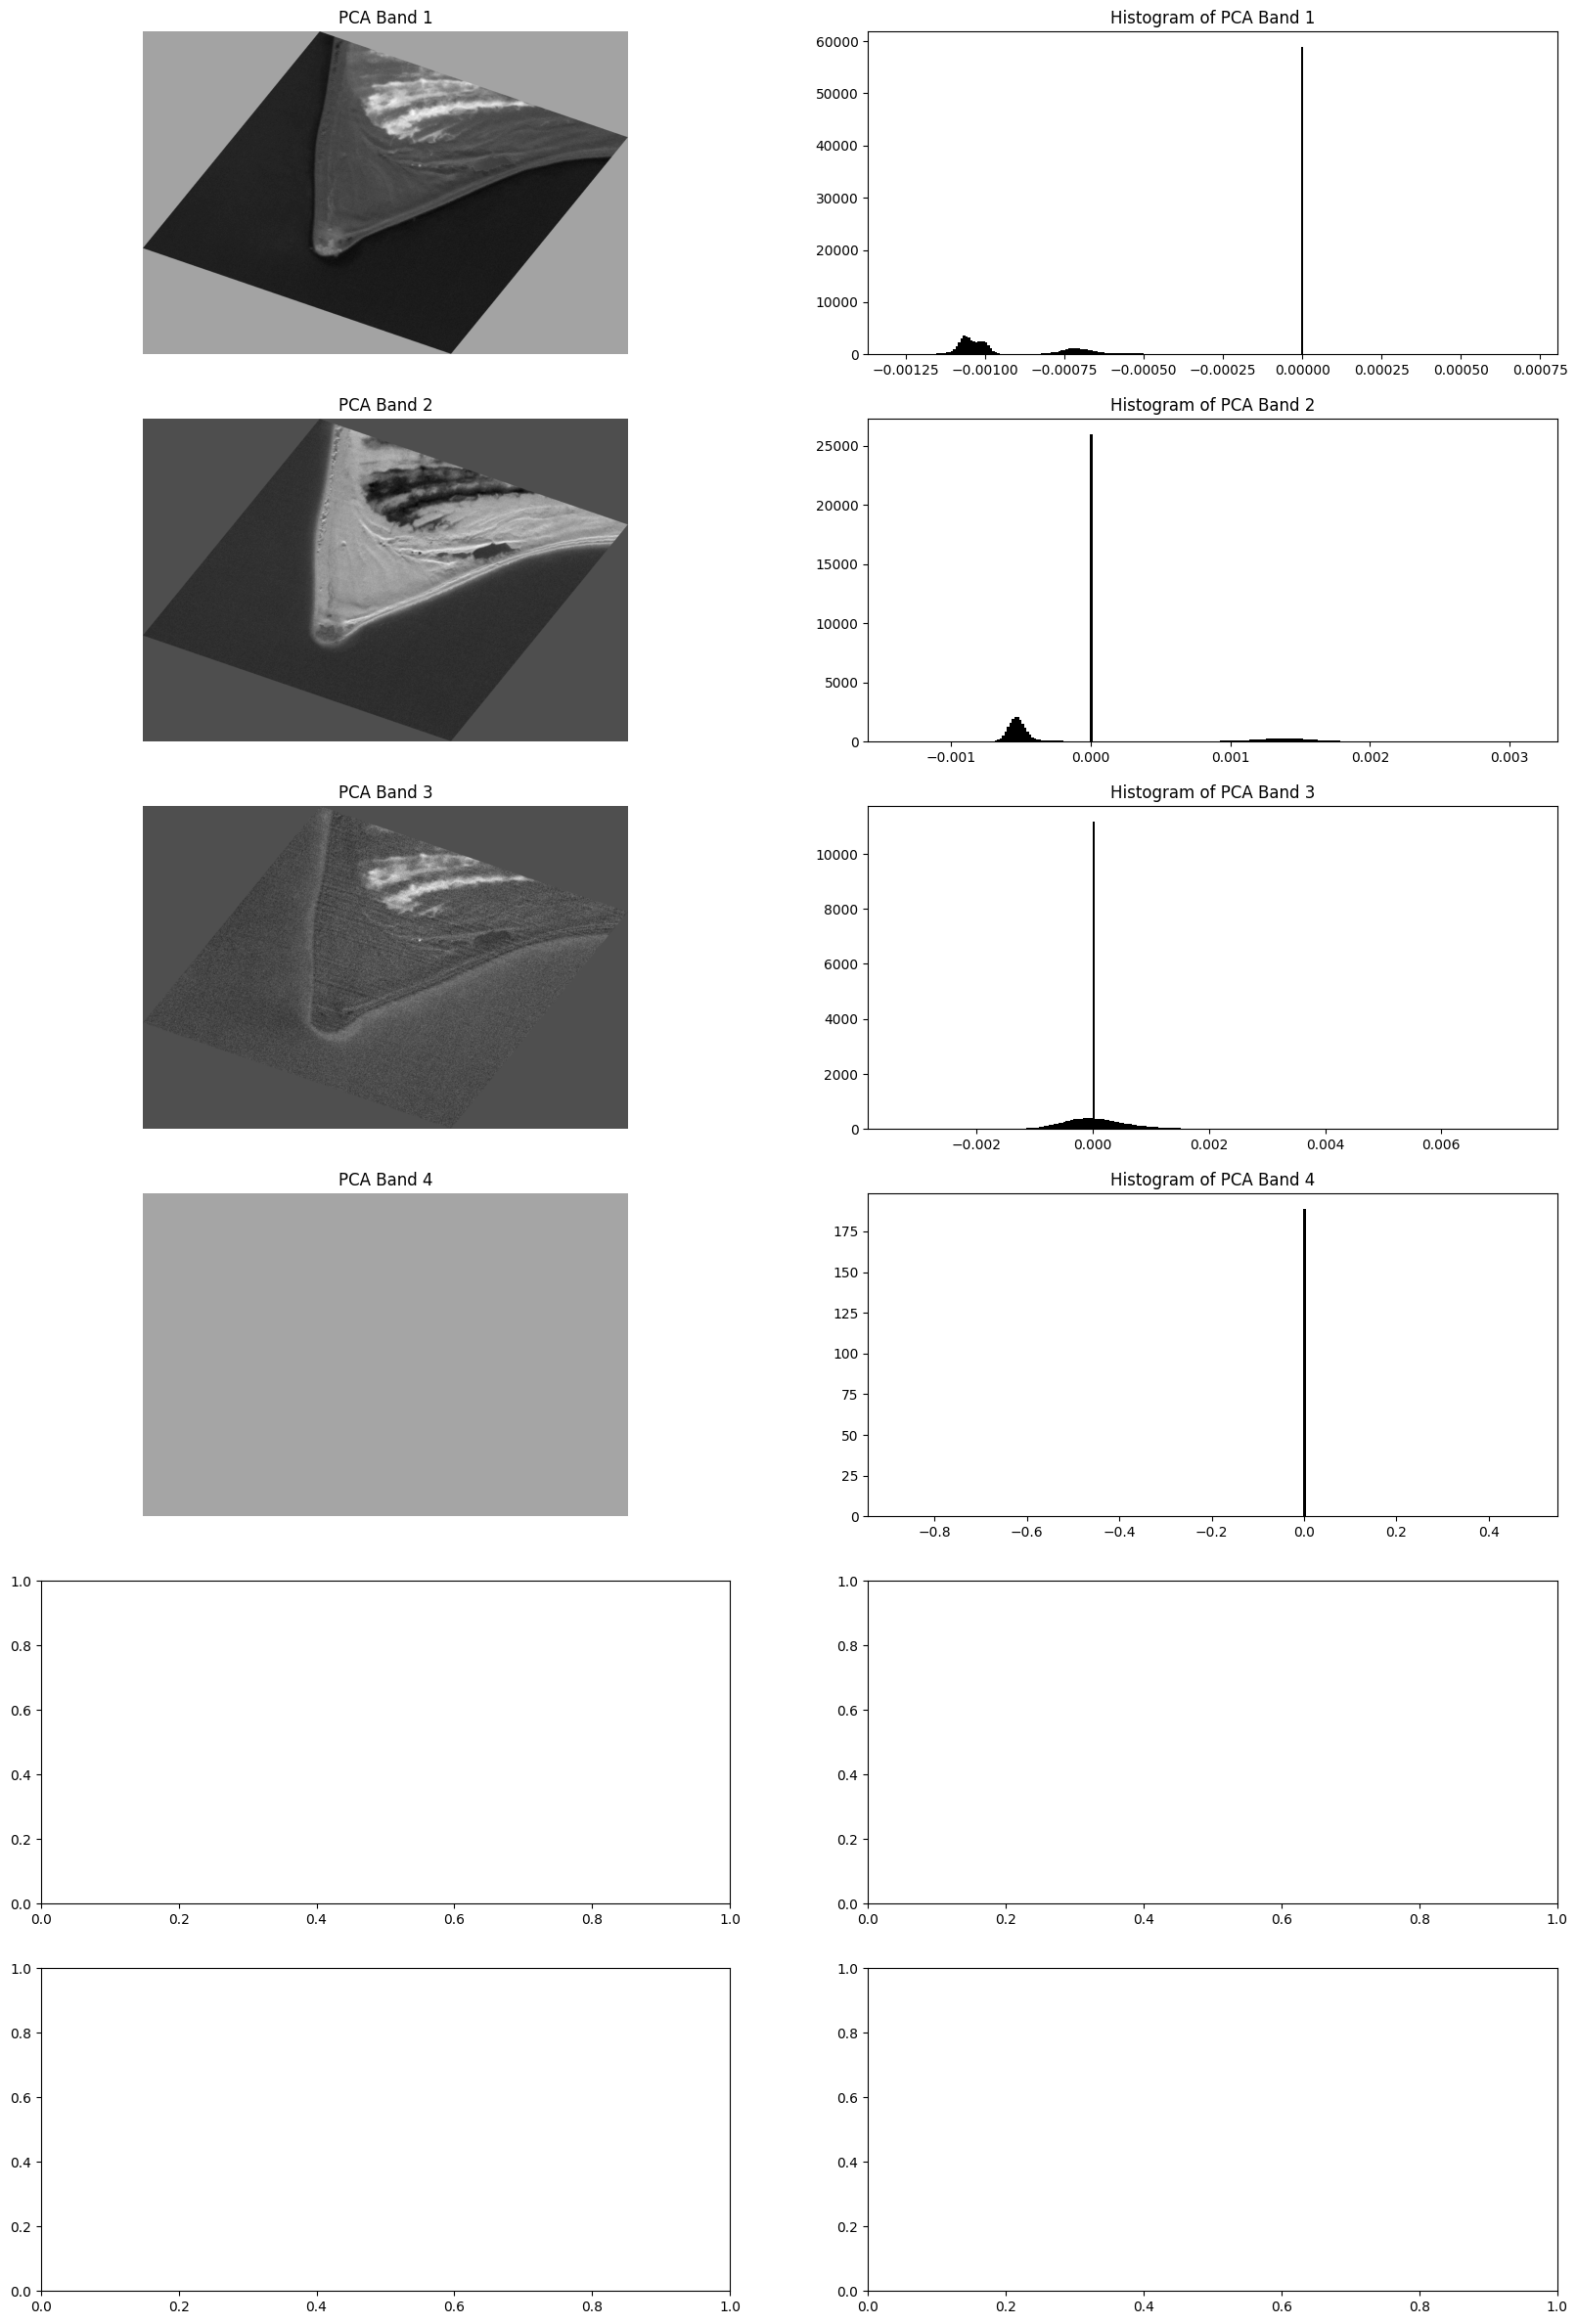

In [19]:
fig , ax = plt.subplots(nrows=6 , ncols=2, figsize=(20,30))
ax[0,0].imshow(pc1, cmap='gray')
ax[0,0].set_title('PCA Band 1')
ax[0,0].axis('off')
ax[0,1].hist(pc1.ravel(), bins=256, density=True, histtype='bar', color='black')
ax[0,1].set_title('Histogram of PCA Band 1')
#########################
ax[1,0].imshow(pc2, cmap='gray')
ax[1,0].set_title('PCA Band 2')
ax[1,0].axis('off')
ax[1,1].hist(pc2.ravel(), bins=256, density=True, histtype='bar', color='black')
ax[1,1].set_title('Histogram of PCA Band 2')
##########################
ax[2,0].imshow(pc3, cmap='gray')
ax[2,0].set_title('PCA Band 3')
ax[2,0].axis('off')
ax[2,1].hist(pc3.ravel(), bins=256, density=True, histtype='bar', color='black')
ax[2,1].set_title('Histogram of PCA Band 3')
##########################
ax[3,0].imshow(pc4, cmap='gray')
ax[3,0].set_title('PCA Band 4')
ax[3,0].axis('off')
ax[3,1].hist(pc4.ravel(), bins=256, density=True, histtype='bar', color='black')
ax[3,1].set_title('Histogram of PCA Band 4')
#########################
ax[4,0].imshow(pc5, cmap='gray')
ax[4,0].set_title('PCA Band 5')
ax[4,0].axis('off')
ax[4,1].hist(pc5.ravel(), bins=256, density=True, histtype='bar', color='black')
ax[4,1].set_title('Histogram of PCA Band 5')
##########################
ax[5,0].imshow(pc6, cmap='gray')
ax[5,0].set_title('PCA Band 6')
ax[5,0].axis('off')
ax[5,1].hist(pc6.ravel(), bins=256, density=True, histtype='bar', color='black')
ax[5,1].set_title('Histogram of PCA Band 6')
plt.show()

This didnt work, cant remember why i was trying. google later if have time. 